In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [343]:
from sklearn.datasets import fetch_california_housing 
cal_housing=fetch_california_housing()

In [344]:
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names) # convert to dataframe

In [345]:
df['target']=cal_housing.target

In [346]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Data Exploring ,cleaning and preprocessing

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [349]:
df.duplicated().sum()

0

In [350]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [351]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [352]:
df.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

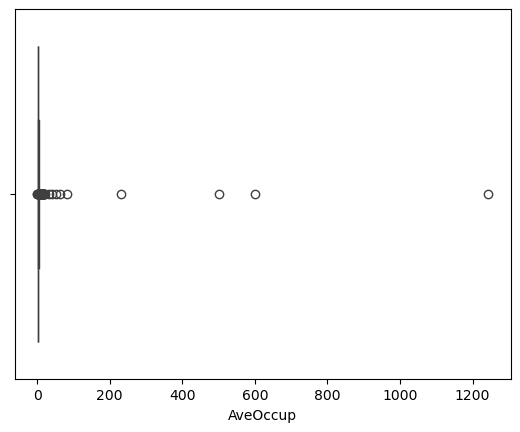

In [353]:
sns.boxplot(df['AveOccup'],orient='h')
plt.show()

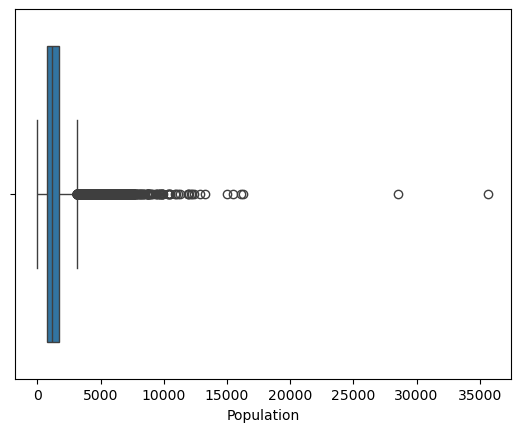

In [354]:
sns.boxplot(df['Population'],orient='h')
plt.show()

In [355]:
q1=df['AveOccup'].quantile(0.25)
q2=df['AveOccup'].quantile(0.75)
iqr=q2-q1
lower=q1-iqr*1.5
upper=q2+iqr*1.5

In [356]:
data1=df[(df['AveOccup']<upper) & (df['AveOccup']>lower)]

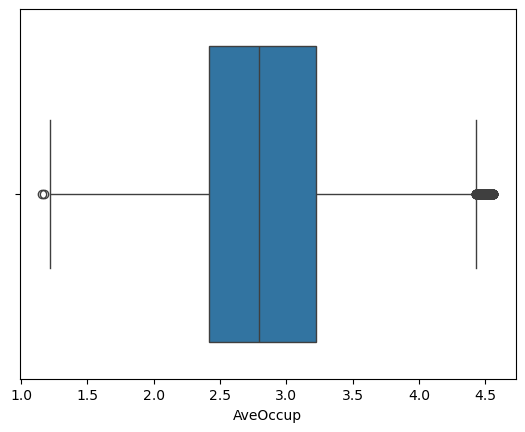

In [357]:
sns.boxplot(data1['AveOccup'],orient='h')
plt.show()

In [358]:
p1=df['Population'].quantile(0.25)
p2=df['Population'].quantile(0.75)
iqr1=p2-p1
lower1=p1-iqr1*1.5
upper1=p2+iqr1*1.5

In [359]:
data1=df[(df['Population']<upper1) & (df['Population']>lower1)]

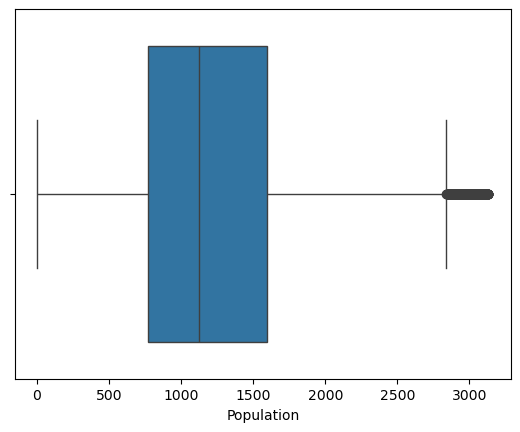

In [360]:
sns.boxplot(data1['Population'],orient='h')
plt.show()

In [361]:
data1.skew()

MedInc         1.672878
HouseAge       0.030359
AveRooms      20.653872
AveBedrms     30.469423
Population     0.692011
AveOccup      19.705840
Latitude       0.444435
Longitude     -0.278631
target         0.966405
dtype: float64

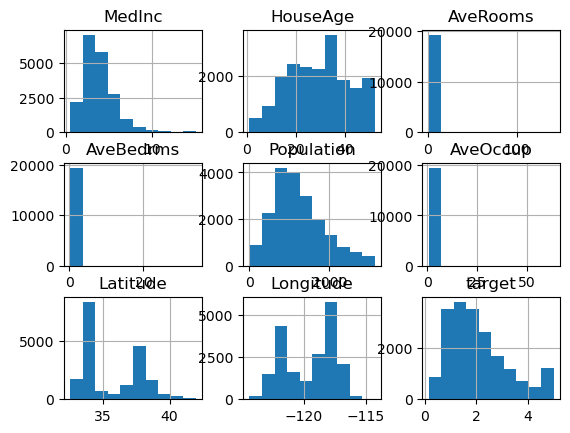

In [362]:
nu=data1.select_dtypes("number")
nu.hist()
plt.show()

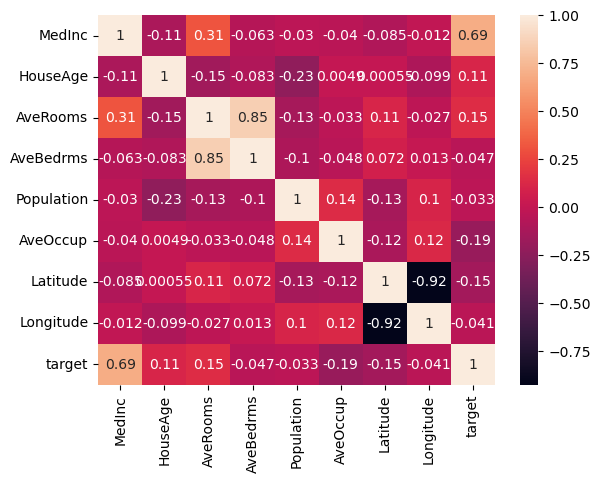

In [363]:
corr=nu.corr()
sns.heatmap(corr,annot=True)
plt.show()

# Split the dataset into features (X) and target (y)

In [365]:
X = data1.drop('target', axis=1)
y=data1['target']

# Scaling feature(training) data

In [367]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#  Split the dataset into training and testing sets

In [369]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

# Linear Regression
Linear Regression is a linear model that predicts a continuous output variable based on one or more input features. It works by learning the coefficients of a linear equation that minimizes the difference between predicted and actual values.


In [371]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [372]:
# Predictions
y_pred = model.predict(X_test)

#  SVR model
Support Vector Regressor (SVR) is a linear or non-linear model that predicts a continuous output variable by finding the hyperplane that maximizes the margin between the predicted and actual values.
How it works:
1. The data is mapped into a higher-dimensional space using a kernel function.
2. The algorithm finds the hyperplane that maximizes the margin between the predicted and actual values.
3. The predicted value is the value of the hyperplane at the input feature.


In [374]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)


SVR()

In [375]:
# Predictions
svr_pred = svr_model.predict(X_test)

# Gradient Boosting
It is an ensemble model that combines multiple weak models to create a strong predictive model.
How it works:
1. An initial weak model (e.g., Decision Tree) is trained on the data.
2. The residuals (errors) from the initial model are calculated.
3. A new weak model is trained on the residuals.
4. Steps 2-3 are repeated multiple times, with each new model attempting to correct the errors of the previous model.
5. The predicted value is the sum of the predictions from all weak models.


In [377]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [378]:
# Predictions
gb_pred = gb_model.predict(X_test)

# Random Forest
It is an ensemble model that combines multiple Decision Trees to improve prediction accuracy.
How it works:
1. A random subset of features is selected at each node.
2. A Decision Tree is trained on the selected features.
3. Steps 1-2 are repeated multiple times, creating an ensemble of Decision Trees.
4. The predicted value is the average of the predictions from all Decision Trees.



In [380]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [381]:
# Predictions 
rf_pred = rf_model.predict(X_test)

# Decision Tree
It is a tree-based model that predicts a continuous output variable by recursively partitioning the input data into smaller subsets based on feature values.
How it works:
1. The algorithm starts with the root node, which represents the entire dataset.
2. It selects the best feature to split the data based on a criterion like mean squared error.
3. The data is split into two child nodes based on the selected feature.
4. Steps 2-3 are repeated recursively until a stopping criterion is reached (e.g., maximum depth).
5. The predicted value is the average of the target variable values in the leaf node.


In [383]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [384]:
# Predictions
dt_pred = dt_model.predict(X_test)

# Evaluation
# Calculate Mean Absolute Error,Mean Squared Error and R² Score for testing data

In [386]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = [] # Initialize an empty list to store results

# Linear Regression

In [388]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [389]:
# Append results to the list
results.append({
    'Model': 'Linear Regression',
    'Mean Absolute Error' :mae,
    'Mean Squared Error': mse,
    'R2 Score (Test)': r2,
    })

# Support Vector Regression

In [391]:
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

In [392]:
# Store results
results.append({
    'Model': 'Support Regression',
    'Mean Absolute Error' :svr_mae,
    'Mean Squared Error': svr_mse,
    'R2 Score (Test)': svr_r2,
    })

# Gradient Booster

In [394]:
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

In [395]:
# Store results
results.append({
    'Model': 'Gradient Booster',
    'Mean Absolute Error' :gb_mae,
    'Mean Squared Error': gb_mse,
    'R2 Score (Test)': gb_r2,
    })

# Random forest

In [397]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [398]:
# Store results
results.append({
    'Model': 'Random Forest',
    'Mean Absolute Error' :rf_mae,
    'Mean Squared Error': rf_mse,
    'R2 Score (Test)': rf_r2
    })

# Decision Tree

In [400]:
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

In [401]:
# Append results to the list
results.append({
    'Model': 'Decision Tree',
   'Mean Absolute Error':dt_mae,
    'Mean Squared Error': dt_mse,
    'R2 Score (Test)': dt_r2
})

In [402]:
results_df = pd.DataFrame(results)  # Create a DataFrame to display the results
results_df

,Model,Mean Absolute Error,Mean Squared Error,R2 Score (Test)
0,Linear Regression,0.508089,0.525718,0.603228
1,Support Regression,0.366362,0.294455,0.777768
2,Gradient Booster,0.367357,0.277461,0.790593
3,Random Forest,0.332020,0.253953,0.808335
4,Decision Tree,0.473394,0.556333,0.580121


Observations and Insights
1. Random Forest performs best: With the lowest MAE (0.331245) and MSE (0.253591), and the highest R2 Score (0.808609), Random Forest appears to be the most accurate model for this dataset.
2. Gradient Boosting and Support Vector Regression are close seconds: Both models have similar performance metrics, with Gradient Boosting having a slightly lower MSE.
3. Linear Regression and Decision Tree underperform: These models have higher error metrics and lower R2 Scores, indicating they may not be the best choices for this dataset.
